# Generate Word Clouds of Any Shape in Python

Source code from Medium's article [Generate Word Clouds of Any Shape in Python](https://towardsdatascience.com/generate-word-clouds-of-any-shape-in-python-e87f265f6352) written by [Rashida Nasrin Sucky](https://towardsdatascience.com/@sucky00).

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Simple Word Cloud

In [3]:
df = pd.read_csv("./winemag-data-130k-v2.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [6]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
df.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [8]:
text = " ".join(review for review in df.description)
print(f"There are {len(text)} words in the combination of all reviews")

There are 31661073 words in the combination of all reviews


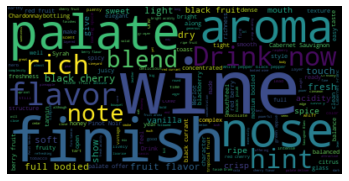

In [9]:
wordcl = WordCloud().generate(text)

plt.imshow(wordcl, interpolation='bilinear')
plt.axis("off")
plt.show()

## Improve the Word Cloud

In [28]:
stopwords = ["drink", "now", "wine", "made"] + list(STOPWORDS)

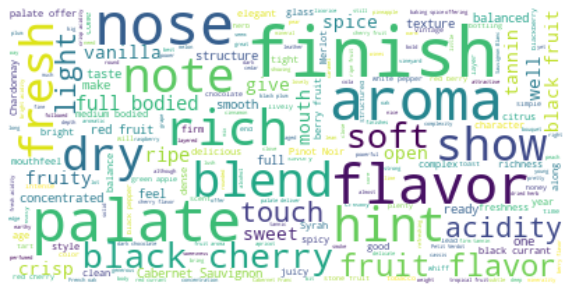

In [29]:
wordcl = WordCloud(stopwords=stopwords, background_color="white",
                   max_font_size=50, max_words=2000).generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcl, interpolation="bilinear")
plt.axis("off")
plt.show()

## Use a Custom Shape

In [15]:
mask = np.array(Image.open("./w_wine.png"))

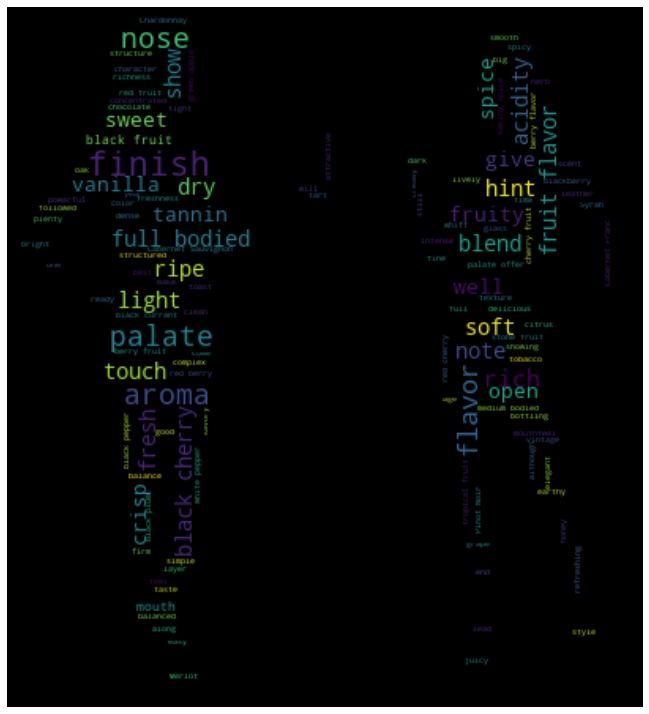

In [30]:
wc = WordCloud(stopwords=stopwords, background_color="black", mask=mask,
               mode="RGB", width = 1000, max_words=200, height=1000,
               random_state=1)
wc.generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

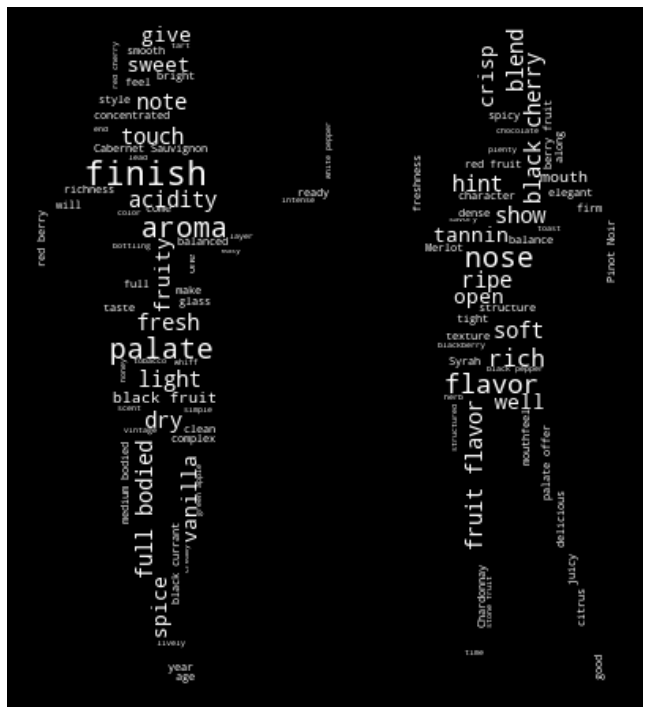

In [31]:
wc = WordCloud(stopwords=stopwords, background_color='black', mask=mask,
               mode='RGB', color_func=lambda *args, **kwargs: "white", 
               width=1000, max_words=200, height=1000,
               random_state=1)
wc.generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

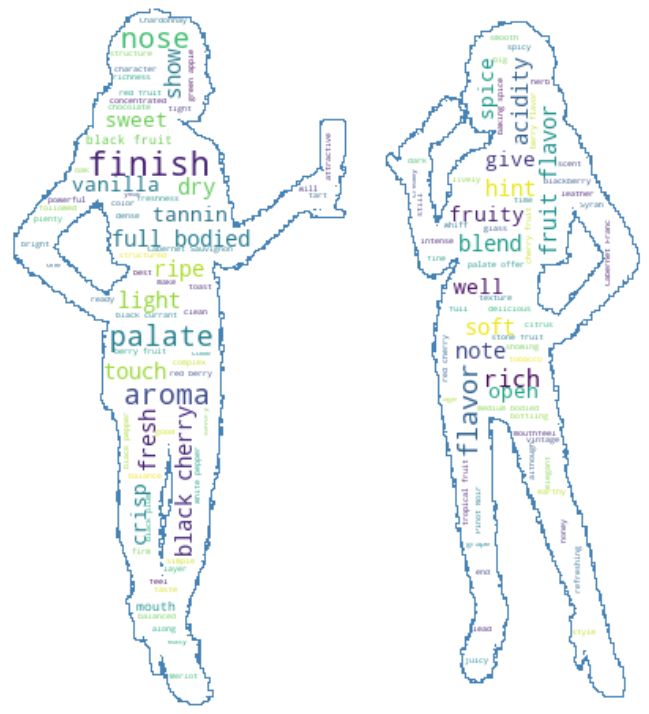

In [32]:
wc = WordCloud(stopwords=stopwords, background_color='white', mask=mask, mode='RGB',
               width=1000, max_words=1000, height=1000, random_state=1,
               contour_width=1, contour_color='steelblue')
wc.generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [33]:
mask = np.array(Image.open("./w_girl_wine.png"))

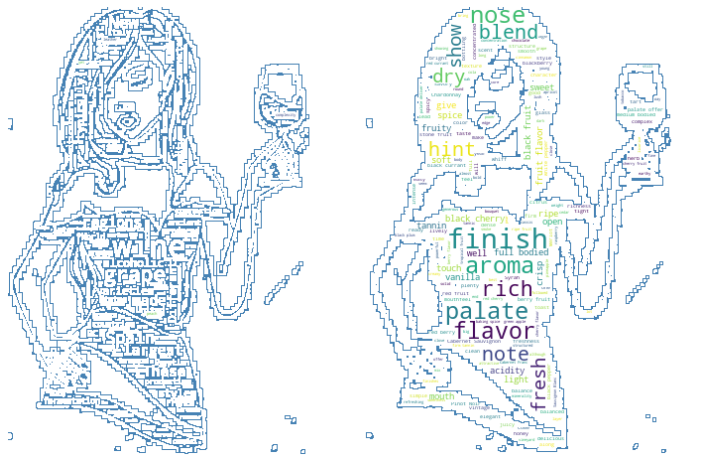

In [34]:
wc = WordCloud(stopwords=stopwords, background_color='white', mask=mask, mode='RGB',
               width=1000, max_words=1000, height=1000, random_state=1,
               contour_width=1, contour_color='steelblue')
wc.generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

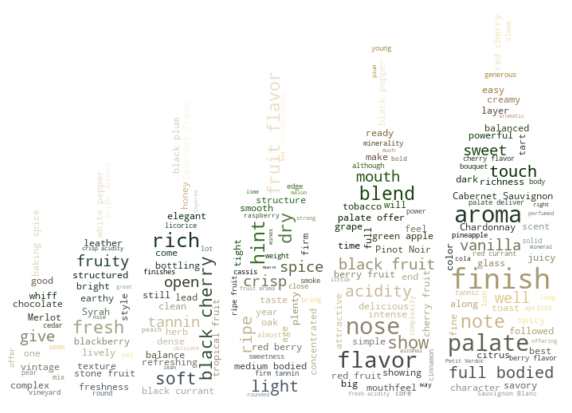

In [37]:
bottles = np.array(Image.open("bottles.png"))

wc = WordCloud(stopwords=stopwords, background_color='white', mask=bottles)
wc.generate(text)
image_colors = ImageColorGenerator(bottles)
wc.recolor(color_func=image_colors)

plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

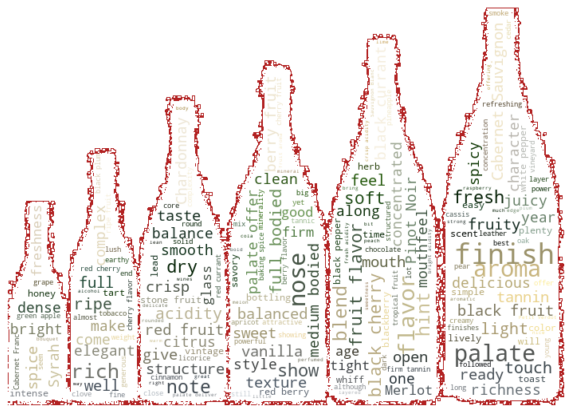

In [38]:
wc = WordCloud(stopwords=stopwords, background_color="white", mask=bottles,
               contour_width=1, contour_color='firebrick')
wc.generate(text)
image_colors = ImageColorGenerator(bottles)
wc.recolor(color_func=image_colors)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
wc.to_file("./wine.png")